### Importing the libraries

In [289]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [290]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

In [291]:
with open('Dataset/andhra.geojson') as f:
    data = json.load(f)

In [292]:
features = data['features']

# Extracting the 'geometry' and 'properties' data from each feature.
geometries = [feature['geometry'] for feature in features]
properties = [feature['properties'] for feature in features]

# Convert the lists of geometries and properties to pandas DataFrames.
df1_geometries = pd.DataFrame(geometries)
df1_properties = pd.DataFrame(properties)

In [293]:
df1_geometries

,type,coordinates
0,Polygon,"[[[81.82451255693135, 17.411018377030054], [81..."
1,Polygon,"[[[81.82385511688355, 17.411244985301916], [81..."
2,Polygon,"[[[81.82429902246463, 17.41124466538737], [81...."
3,Polygon,"[[[81.82370156042133, 17.411375830207582], [81..."
4,Polygon,"[[[81.82379376135411, 17.4115639395899], [81.8..."
...,...,...
123,Polygon,"[[[81.82469464828425, 17.414002625839718], [81..."
124,Polygon,"[[[81.82477746148544, 17.414022140317112], [81..."
125,Polygon,"[[[81.82475801547082, 17.414304620140154], [81..."
126,Polygon,"[[[81.82449549426968, 17.414406351158778], [81..."


In [294]:
df1_properties

,id,class_id,density
0,53861968,00m-04m,None
1,53861969,00m-04m,None
2,53861970,00m-04m,None
3,53861971,00m-04m,None
4,53861972,00m-04m,None
...,...,...,...
123,53862091,04m-10m,dense
124,53862092,04m-10m,dense
125,53862093,04m-10m,dense
126,53862094,04m-10m,dense


In [295]:
# Concatenating the DataFrames
df1 = pd.concat([df1_geometries, df1_properties], axis=1)
df1

,type,coordinates,id,class_id,density
0,Polygon,"[[[81.82451255693135, 17.411018377030054], [81...",53861968,00m-04m,None
1,Polygon,"[[[81.82385511688355, 17.411244985301916], [81...",53861969,00m-04m,None
2,Polygon,"[[[81.82429902246463, 17.41124466538737], [81....",53861970,00m-04m,None
3,Polygon,"[[[81.82370156042133, 17.411375830207582], [81...",53861971,00m-04m,None
4,Polygon,"[[[81.82379376135411, 17.4115639395899], [81.8...",53861972,00m-04m,None
...,...,...,...,...,...
123,Polygon,"[[[81.82469464828425, 17.414002625839718], [81...",53862091,04m-10m,dense
124,Polygon,"[[[81.82477746148544, 17.414022140317112], [81...",53862092,04m-10m,dense
125,Polygon,"[[[81.82475801547082, 17.414304620140154], [81...",53862093,04m-10m,dense
126,Polygon,"[[[81.82449549426968, 17.414406351158778], [81...",53862094,04m-10m,dense


#### Plotting the Coordinates

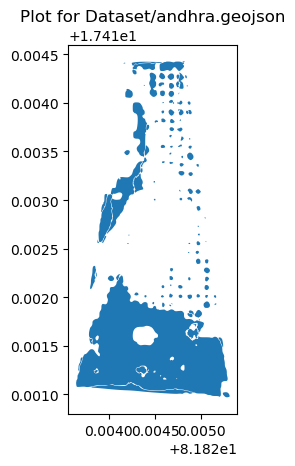

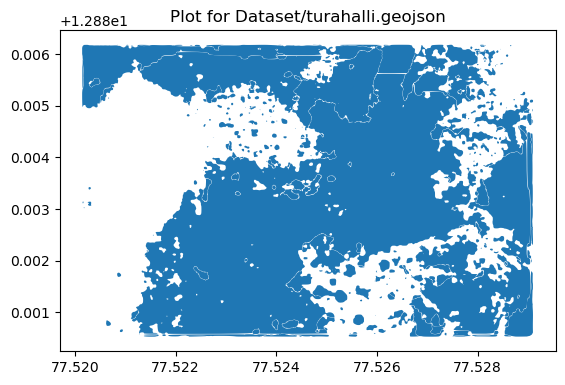

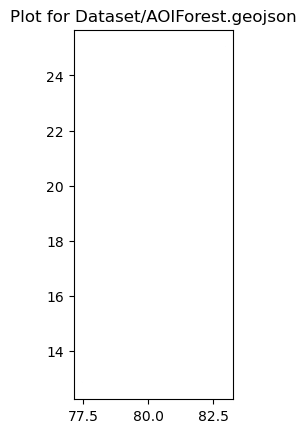

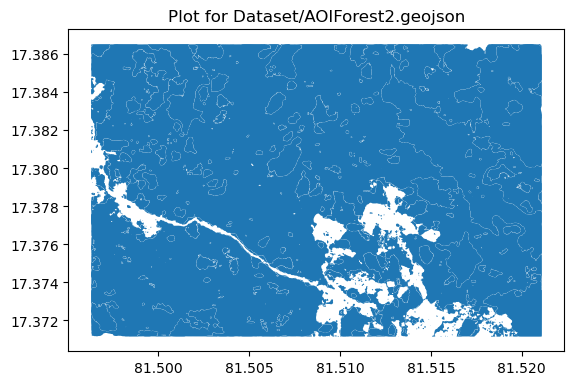

In [299]:
import geopandas as gpd

# List of file paths for the GeoJSON files
file_paths = [
    'Dataset/andhra.geojson',
    'Dataset/turahalli.geojson',
    'Dataset/AOIForest.geojson',
    'Dataset/AOIForest2.geojson',
]

# Loop through each file and create separate plots
for file_path in file_paths:
    # Read the GeoJSON data using geopandas
    gdf = gpd.read_file(file_path)

    # Create a plot for the GeoJSON data
    fig, ax = plt.subplots()

    # Plot the GeoJSON data on the map
    gdf.plot(ax=ax)

    # Set the plot title
    plt.title(f"Plot for {file_path}")
    
    # Save the plot as an image
    image_filename = file_path.replace('.geojson', '.png')
    plt.savefig(image_filename)

    # Show the plot
    plt.show()
    plt.close()

#### Dropping 'Dataset/AOIForest.geojson' because of lack of enough geographical coordinates to plot the figure

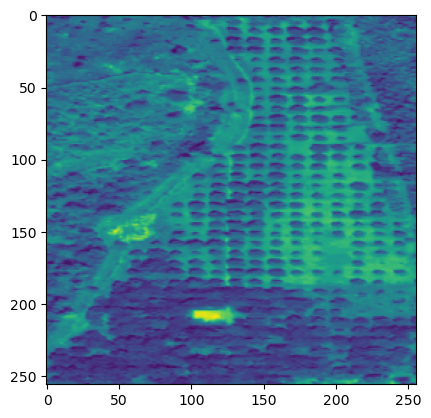

In [300]:
import cv2
 
# Printing 1st training image
img = cv2.imread('/home/rijul/Desktop/Projects new/Google_tree_segmentation/train/1.png',0)
img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

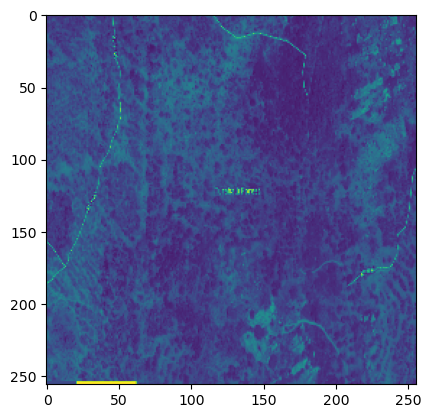

In [301]:
# Printing 2nd training image
img = cv2.imread('/home/rijul/Desktop/Projects new/Google_tree_segmentation/train/2.png',0)
img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

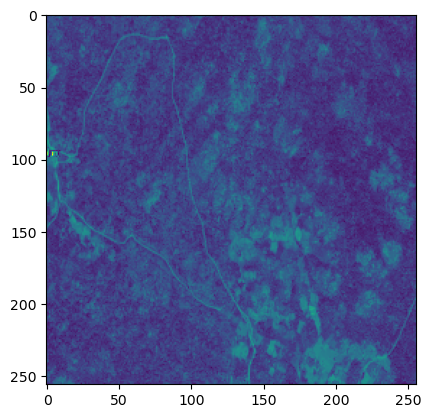

In [302]:
# Printing 3rd training image
img = cv2.imread('/home/rijul/Desktop/Projects new/Google_tree_segmentation/train/3.png',0)
img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

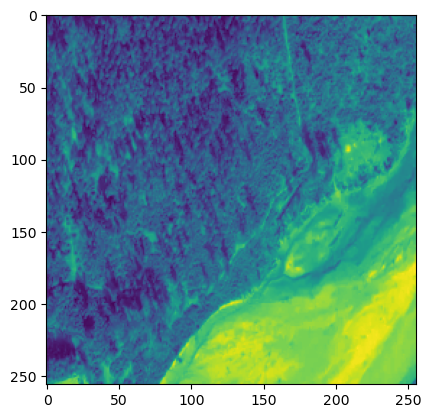

In [381]:
# Printing testing image [Random map]
img = cv2.imread('/home/rijul/Desktop/Projects new/Google_tree_segmentation/test/random.png',0)
img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

#### Plotting the tree annotations on the training images

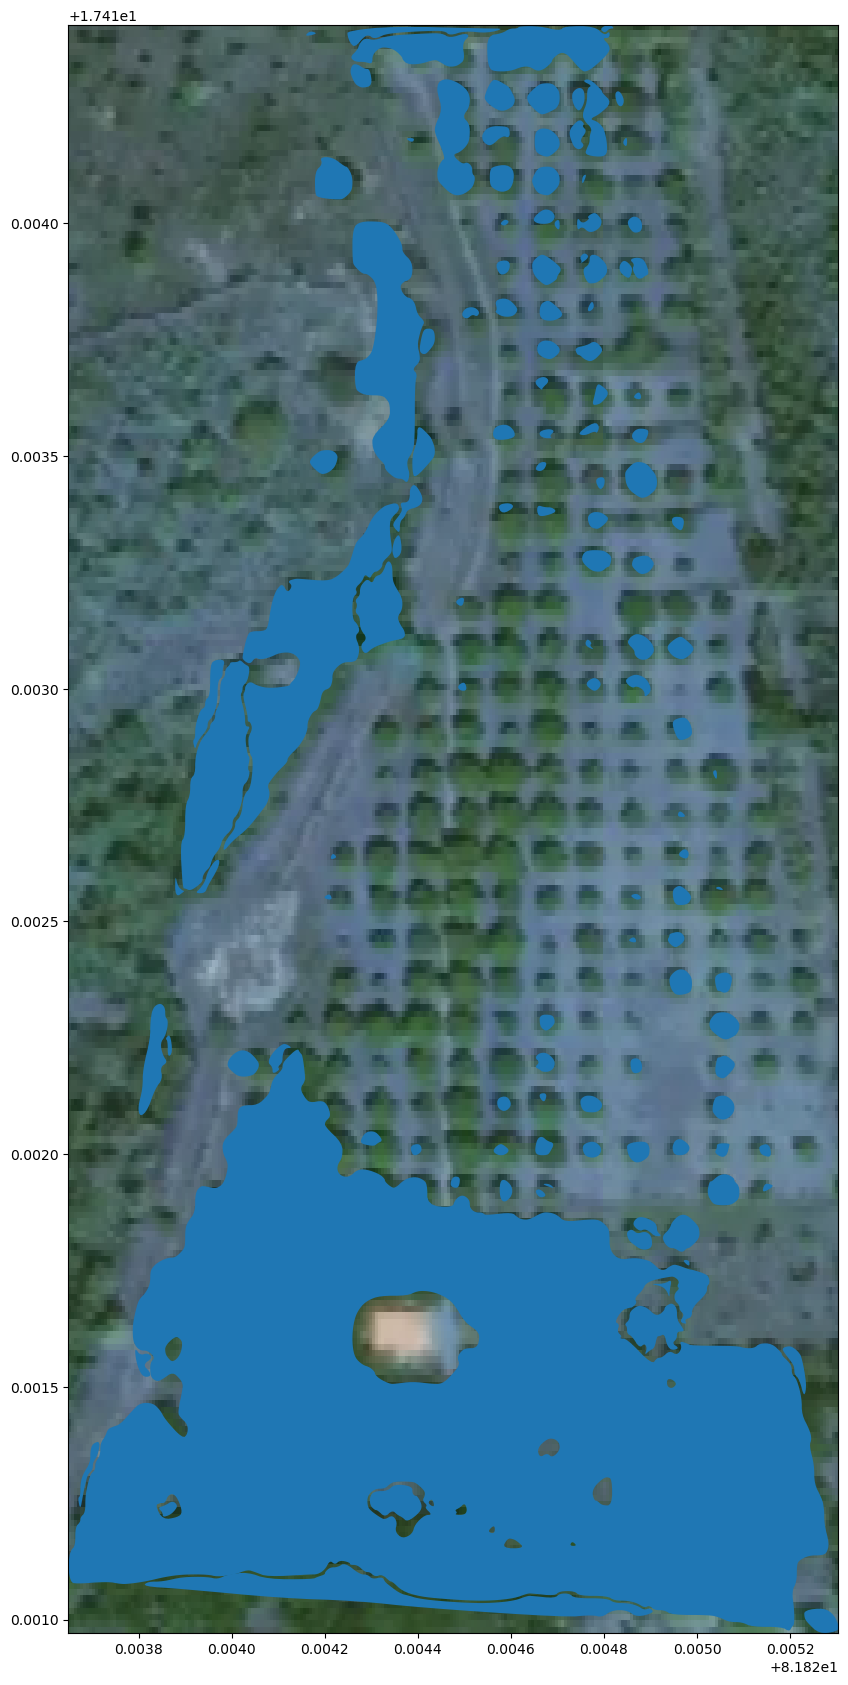

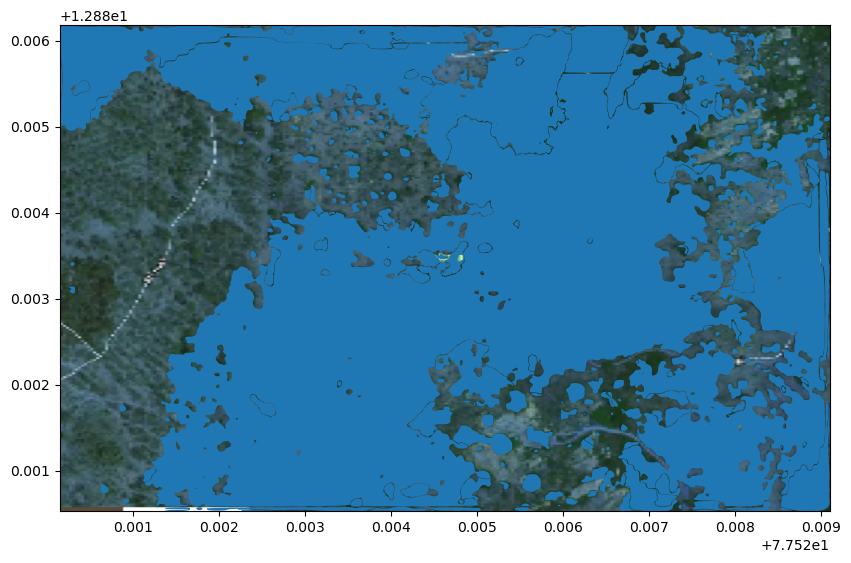

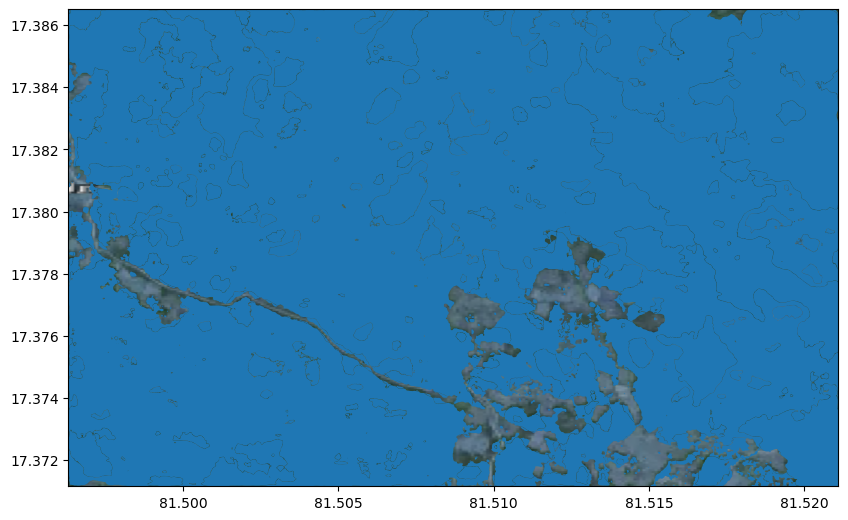

In [304]:
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

# List of GeoJSON files path for training images
file_paths = [
    'Dataset/andhra.geojson',
    'Dataset/turahalli.geojson',
    'Dataset/AOIForest2.geojson',
]

# File paths for the training images
image_paths = [
    './train/1.png',
    './train/2.png',
    './train/3.png',
]

# Loop through each file and create separate plots
for file_path, image_path in zip(file_paths, image_paths):
    # Read the GeoJSON data using geopandas
    gdf = gpd.read_file(file_path)

    # Read the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))

    # Get the figure size based on the image size
    img_width = gdf.total_bounds[2] - gdf.total_bounds[0]
    img_height = gdf.total_bounds[3] - gdf.total_bounds[1]
    fig_width = 10
    fig_height = img_height / img_width * fig_width

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Plot the GeoJSON data on the map
    gdf.plot(ax=ax)

    # Display the image on the plot
    plt.imshow(img, extent=[gdf.total_bounds[0], gdf.total_bounds[2], gdf.total_bounds[1], gdf.total_bounds[3]])

    # Show the plot with annotations
    plt.show()
    plt.close()


### Mask for Train and Test image :

In [321]:
import cv2
import json
import numpy as np
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import shape, Polygon

# List of GeoJSON files path for training images
file_paths = [
    'Dataset/andhra.geojson',
    'Dataset/turahalli.geojson',
    'Dataset/AOIForest2.geojson',
]

# File paths for the training images
image_paths = [
    './train/1.png',
    './train/2.png',
    './train/3.png',
]

# File path for the test image
test_image_path = './test/random.png'

# Loading training and testing images
train_images = []
for path in image_paths:
    image = cv2.imread(path)
    image = cv2.resize(image, (256, 256))
    train_images.append(image)

test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))

# Updating geojson_to_binary_mask to handle multiple GeoJSON files

def geojson_to_binary_mask(geojson_paths, image_shape):
    masks = []
    for path in geojson_paths:
        with open(path) as f:
            data = json.load(f)

        # Extract the polygon coordinates
        coordinates = data['features'][0]['geometry']['coordinates']

        # Create a shapely Polygon object
        polygon = Polygon(coordinates[0])

        # Convert coordinates to pixel positions
        minx, miny, maxx, maxy = polygon.bounds
        pixel_width = (maxx - minx) / image_shape[1]
        pixel_height = (maxy - miny) / image_shape[0]

        # Create an affine transform for rasterization
        transform = rasterio.Affine(pixel_width, 0, minx, 0, -pixel_height, maxy)

        # Create the binary mask by rasterizing the polygon
        mask = geometry_mask([polygon], out_shape=image_shape, transform=transform, invert=True)
        mask = np.flip(mask, axis=0)
        mask = np.flip(mask, axis=1)

        masks.append(mask.astype(np.uint8))

    return masks

# Mask for Training images
train_masks = geojson_to_binary_mask(file_paths, image_shape=(256, 256))

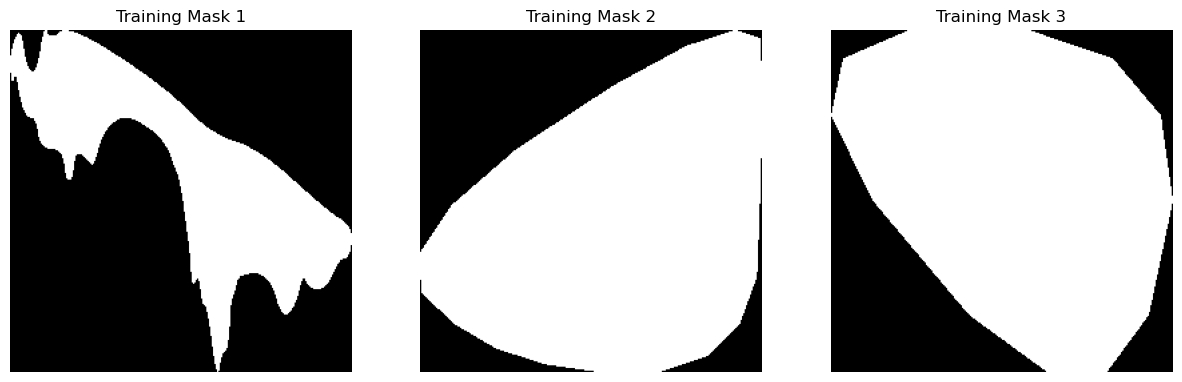

In [322]:
import matplotlib.pyplot as plt

# Print train_masks
plt.figure(figsize=(15, 5))
for i, mask in enumerate(train_masks):
    plt.subplot(1, len(train_masks), i+1)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Training Mask {i+1}')
    plt.axis('off')

plt.show()

In [323]:
for i in range(len(train_masks)):
    print(str(train_masks[i].shape) + '  ' + str(np.unique(train_masks[i])))

(256, 256)  [0 1]
(256, 256)  [0 1]
(256, 256)  [0 1]


## Part 2 - Model Selection

Reasons to use U-Net:<br>1. U-Net is a good choice because of its simplicity and efficiency. <br>2. U-Net can learn to capture fine-grained details in the single image, making it a strong candidate for single-image segmentation tasks.

In [324]:
# U-Net Model

import tensorflow as tf
from tensorflow.keras import layers

def double_conv_block(x, n_filters):
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, strides=2, padding="same")(x)

    # Ensuring that the spatial dimensions match before concatenation
    conv_features = tf.image.resize(conv_features, tf.shape(x)[1:3], method=tf.image.ResizeMethod.BILINEAR)

    # concatenate
    x = layers.concatenate([x, conv_features])

    # dropout
    x = layers.Dropout(0.3)(x)

    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def build_unet_model():
    # inputs
    inputs = layers.Input(shape=(256, 256, 3))

    # encoder:downsample
    f1, p1 = downsample_block(inputs, 32)
    f2, p2 = downsample_block(p1, 64)
    f3, p3 = downsample_block(p2, 128)
    f4, p4 = downsample_block(p3, 256)
    # bottleneck
    bottleneck = double_conv_block(p4, 512)
    
    # decoder:upsample
    u6 = upsample_block(bottleneck, f4, 256)
    u7 = upsample_block(u6, f3, 128)
    u8 = upsample_block(u7, f2, 64)
    u9 = upsample_block(u8, f1, 32)
    
    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(u9)

    # Resize the output to match the target mask's shape
    outputs = tf.image.resize(outputs, (256, 256), method=tf.image.ResizeMethod.BILINEAR)
    
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model

unet_model = build_unet_model()

## Part 3 - Model Training

In [325]:
# Training

# Convert the lists to NumPy arrays
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Check the shape of training data
print("Shape of train_images:", train_images.shape)
print("Shape of train_masks:", train_masks.shape)

# Reshape training data to add the batch and channel dimensions
train_images = np.expand_dims(train_images, axis=-1)
train_masks = np.expand_dims(train_masks, axis=-1)

# Checking the new shape of the data
print("New shape of train_images:", train_images.shape)
print("New shape of train_masks:", train_masks.shape)

Shape of train_images: (3, 256, 256, 3)
Shape of train_masks: (3, 256, 256)
New shape of train_images: (3, 256, 256, 3, 1)
New shape of train_masks: (3, 256, 256, 1)


In [326]:
# Training the model
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_model.fit(train_images, train_masks, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 8.7464 - accuracy: 0.4281
Epoch 2/10
1/1 [==============================] - 1s 933ms/step - loss: 7.1991 - accuracy: 0.5059
Epoch 3/10
1/1 [==============================] - 1s 981ms/step - loss: 6.4221 - accuracy: 0.5744
Epoch 4/10
1/1 [==============================] - 1s 950ms/step - loss: 6.4399 - accuracy: 0.5748
Epoch 5/10
1/1 [==============================] - 1s 966ms/step - loss: 6.3747 - accuracy: 0.5760
Epoch 6/10
1/1 [==============================] - 1s 927ms/step - loss: 6.1071 - accuracy: 0.5689
Epoch 7/10
1/1 [==============================] - 1s 973ms/step - loss: 6.2589 - accuracy: 0.4987
Epoch 8/10
1/1 [==============================] - 1s 962ms/step - loss: 5.7347 - accuracy: 0.5474
Epoch 9/10
1/1 [==============================] - 1s 959ms/step - loss: 5.9231 - accuracy: 0.5892
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 5.3075 - accuracy: 0.5490


### Obtained Training Accuracy of 54.90%

## Part 4 - Model Testing And Visualization

In [364]:
# Loading the test image
test_image_path = './test/random.png'
test_image = cv2.imread(test_image_path)

# Resizing the image to (256,256)
test_image = cv2.resize(test_image, (256, 256))

# Add a batch dimension to the test image
test_image = np.expand_dims(test_image, axis=0)

# Perform prediction using the trained model
predicted_mask = unet_model.predict(test_image)

1/1 [==============================] - 0s 116ms/step


In [365]:
np.unique(predicted_mask)

array([3.3965192e-31, 5.6805962e-31, 6.5010207e-31, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

In [367]:
test_image.shape

(1, 256, 256, 3)

In [368]:
predicted_mask.shape

(1, 256, 256, 1)

In [376]:
predicted_mask_squeeze = np.squeeze(predicted_mask, axis=0)

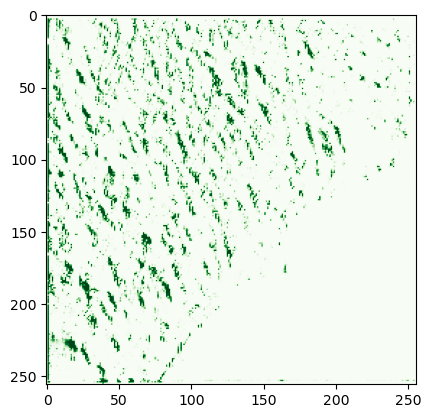

In [377]:
plt.imshow(predicted_mask_squeeze, cmap='Greens')
plt.show()

In [378]:
np.unique(predicted_mask_squeeze)

array([3.3965192e-31, 5.6805962e-31, 6.5010207e-31, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

In [379]:
predicted_mask_squeeze.shape

(256, 256, 1)

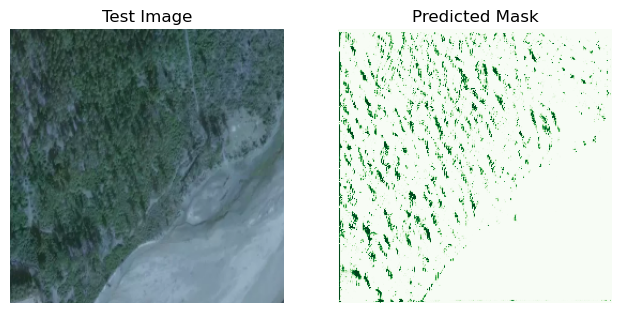

In [380]:
plt.figure(figsize=(12, 6))

# Plot the test image
plt.subplot(1, 3, 1)
plt.imshow(test_image[0])
plt.title('Test Image')
plt.axis('off')

# Plot the predicted mask
plt.subplot(1, 3, 2)
plt.imshow(predicted_mask_squeeze, cmap='Greens')
plt.title('Predicted Mask')
plt.axis('off')
plt.show()

#### In the Previous Assignment submission we had 70% training accuracy but Predicted Mask was not good. <br>
#### But in this assignment [after increasing training data], although we have 54.90% training accuracy but much better Prediction. <br>
### This is because of the overfitting which is getting reduced as Training Dataset increases.

## Part 5 - Performance Comparison

### Using Edge Detection:

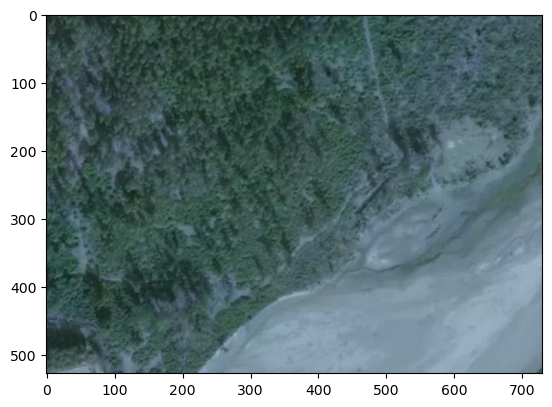

In [340]:
# read input image
image = cv2.imread('./test/random.png')
plt.imshow(image)
plt.show()

In [341]:
# Convert the  BGR image to grayscale
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

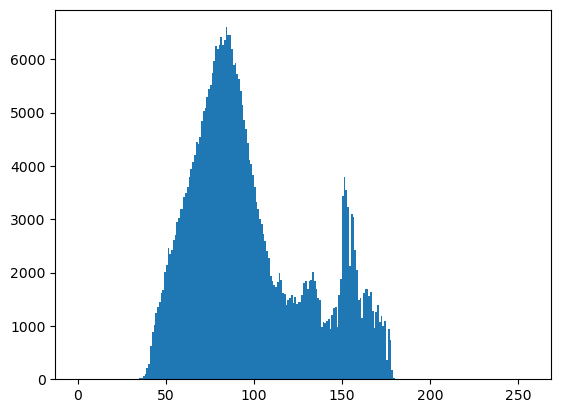

In [342]:
# draw histogram for image
plt.hist(gray.ravel(), 256,[0, 256])
plt.show()

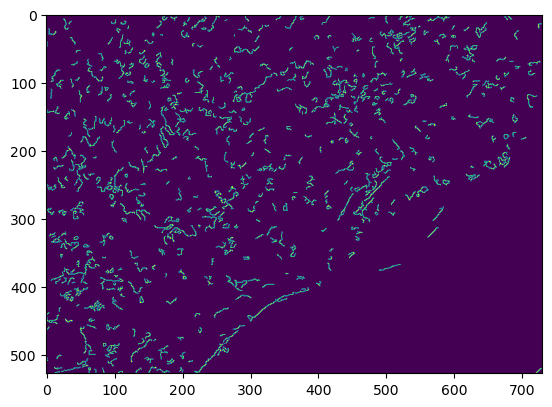

In [343]:
# Apply Canny edge detection on image
edges = cv2.Canny(gray, 80, 150)

plt.imshow(edges)
plt.show()

In [344]:
# Finding Contours
# since findContours alters the image
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 648


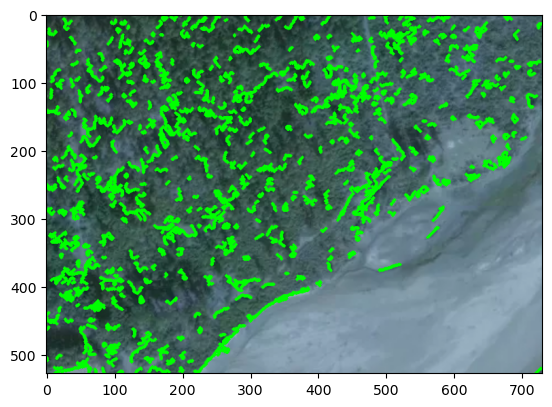

In [345]:
# Draw all contours
# -1 signifies drawing all contours
img = image.copy()
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
  
plt.imshow(img)
plt.show()

#### Edge Detection vs Unet segmentation: <br>1. We can get good output even with only 1 image as input in edge detection but if we use unet then we need more training data.<br>2. If we have large amount of training data then unet segmentation is much better.